##총수익스왑 (Total Return Swap, TRS)
총수익스왑은 기초 자산의 총수익(이자 수익 + 자본 이득)을 한 당사자가 받고, 다른 당사자가 고정 금리 또는 변동 금리를 지급하는 계약입니다.

총수익스왑(Total Return Swap, TRS)은 한 당사자가 기초 자산의 총수익(이자 수익 + 자본 이득)을 받고, 다른 당사자가 고정 금리 또는 변동 금리를 지급하는 계약입니다. 이는 기초 자산의 성과를 기반으로 수익을 교환하는 파생상품입니다.

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


초기 가격: 2695.81 USD
최종 가격: 3839.50 USD
자본 이득: 1143.69 USD
총 배당 수익: 808.74 USD
총 수익: 1952.43 USD
총 고정 금리 지불: 450000.00 USD
총수익스왑 가치: -448047.57 USD


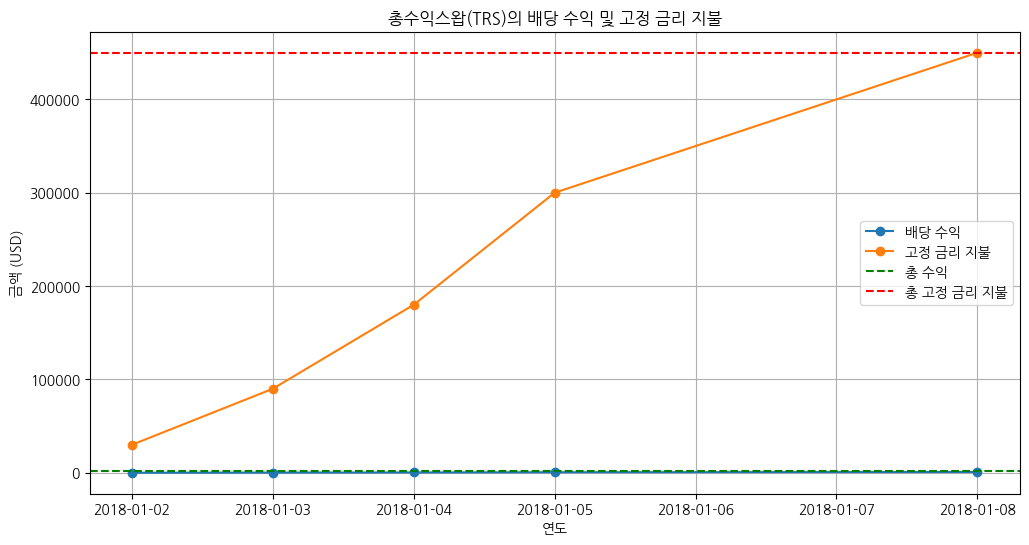

In [2]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# TRS 계약 파라미터
notional = 1000000  # 명목 금액
fixed_rate = 0.03  # 고정 금리 (3%)
maturity = 5  # TRS 만기 (5년)
payment_dates = np.arange(1, maturity + 1)  # 지불 날짜 (매년)

# 실제 데이터 가져오기
# S&P 500 지수 데이터
sp500 = yf.Ticker("^GSPC")
sp500_data = sp500.history(start="2018-01-01", end="2023-01-01")
prices = sp500_data['Close'].values

# 초기 및 만기 가격
initial_price = prices[0]
final_price = prices[-1]

# 배당 수익률 (예: 2%)
dividend_yield = 0.02
dividends = initial_price * dividend_yield * payment_dates

# 자본 이득 계산
capital_gains = final_price - initial_price

# 총 수익 계산
total_returns = capital_gains + np.sum(dividends)

# 고정 금리 지불 계산
fixed_payments = notional * fixed_rate * payment_dates

# 총수익스왑 계약의 총 수익 및 고정 금리 지불 계산
total_return_swap_value = total_returns - np.sum(fixed_payments)

print(f"초기 가격: {initial_price:.2f} USD")
print(f"최종 가격: {final_price:.2f} USD")
print(f"자본 이득: {capital_gains:.2f} USD")
print(f"총 배당 수익: {np.sum(dividends):.2f} USD")
print(f"총 수익: {total_returns:.2f} USD")
print(f"총 고정 금리 지불: {np.sum(fixed_payments):.2f} USD")
print(f"총수익스왑 가치: {total_return_swap_value:.2f} USD")

# 시각화
dates = sp500_data.index[:maturity]
plt.figure(figsize=(12, 6))

plt.plot(dates, np.cumsum(dividends), label='배당 수익', marker='o')
plt.plot(dates, np.cumsum(fixed_payments), label='고정 금리 지불', marker='o')
plt.axhline(y=total_returns, color='g', linestyle='--', label='총 수익')
plt.axhline(y=np.sum(fixed_payments), color='r', linestyle='--', label='총 고정 금리 지불')
plt.xlabel('연도')
plt.ylabel('금액 (USD)')
plt.title('총수익스왑(TRS)의 배당 수익 및 고정 금리 지불')
plt.legend()
plt.grid(True)
plt.show()
